<a href="https://colab.research.google.com/github/Yaki-55/machineLearning/blob/main/Juega_el_juego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción
Conecta cuatro es un juego en el que dos jugadores alternan turnos dejando caer discos de colores en una cuadrícula vertical. Cada jugador usa un color diferente (generalmente rojo o amarillo), y el objetivo del juego es ser el primer jugador en obtener cuatro discos seguidos.


En esta primera lección, aprenderás cómo configurar el entorno del juego y crear tu primer agente.
La siguiente se centra en los métodos tradicionales para crear IA de juegos. Los agentes que construyas idearán estrategias de juego muy parecidas a las que hacen los humanos: gradualmente y con experiencia.

# Empecemos
El entorno del juego viene equipado con agentes que ya han sido implementados para ti. Para ver una lista de estos agentes predeterminados, ejecute:

In [ ]:
!pip install kaggle_environments

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of shimmy to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.8/953.8 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.2 MB/s eta 0:00:00
  Created wheel for chess: filename=chess-1.11.1-py3-none-any.whl size=148499 sha256=18fc1148c5903a954821ca66083ed5153f6536f1ebc18e2db746079eff0804a8
  Stored in directory: /root/.cache/pip/wheels/2e/2d/23/1bfc95db984ed3ecbf6764167dc7526d0ab521cf9a9852544e
Successfully built chess


In [ ]:
!pip install vec_noise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.1/134.1 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for vec_noise: filename=vec_noise-1.1.4-cp310-cp310-linux_x86_64.whl size=73554 sha256=828ca24a68b6807b3c4ba9b54fae94d130d553854b5652ce56f018af67165ca7
  Stored in directory: /root/.cache/pip/wheels/2b/28/e4/f710af1a5bb24bb6da3d4f65081e268ca85034b7ac0a9237fe
Successfully built vec_noise


In [ ]:
from kaggle_environments import make, evaluate

# Crea el entorno del juego
# Configure debug=True para ver los errores si su agente se niega a ejecutar
env = make("connectx", debug=True)
# Lista de agentes predeterminados disponibles
print(list(env.agents))

['random', 'negamax']




En la siguiente celda de código, el agente random juega una ronda de juego contra una copia de sí mismo.

In [ ]:
# Dos agentes aleatorios juegan una ronda de juego
env.run(["random", "random"])

# Mostrar el juego
env.render(mode="ipython")

Puedes usar el reproductor de arriba para ver el juego en detalle: cada movimiento se captura y se puede reproducir. ¡Prueba esto ahora!

Como pronto verás, esta información resultará increíblemente útil para pensar en formas de mejorar a nuestros agentes.

# Agentes definitorios
Para participar en la competencia, crearás tus propios agentes.

Comenzaremos con algunos ejemplos, para proporcionar algo de contexto. En la celda de código a continuación:



In [ ]:
import random
import numpy as np

In [ ]:
# Selecciona una columna válida al azar
def agent_random(obs, config):
    movimientos_válidos = [col for col in range(config.columns) if obs.board[col] == 0]
    return random.choice(movimientos_válidos)

# Selecciona la columna central
def agent_middle(obs, config):
    return config.columns//2

# Selecciona la columna válida más a la izquierda
def agent_leftmost(obs, config):
    movimientos_válidos = [col for col in range(config.columns) if obs.board[col] == 0]
    return movimientos_válidos[0]




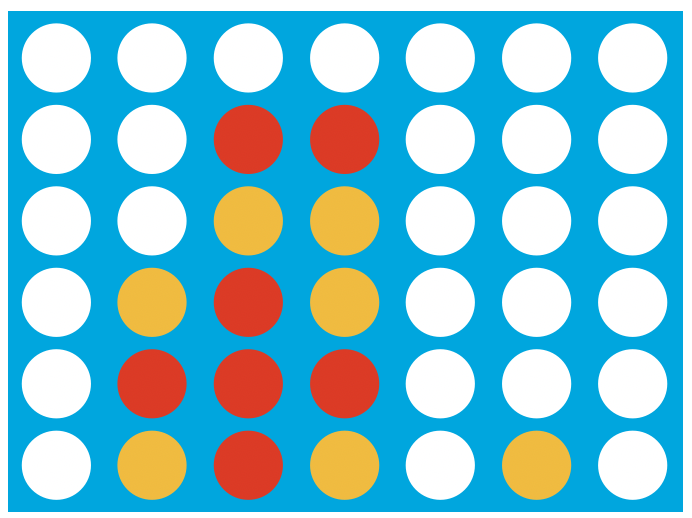

obs.board sería [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0].

# Agentes evaluadores
Para que los agentes personalizados jueguen una ronda de juego, usamos el mismo método env.run() que antes.

In [ ]:
!pip install kaggle-environments -q # Instalar la biblioteca 'kaggle-environments' para el entorno Connect Four.
from kaggle_environments import make

# Los agentes juegan una ronda de juego
env = make("connectx", debug=True) # Inicializar el entorno 'Connect Four' y asignarlo a la variable 'env'.
env.run([agent_leftmost, agent_random])

# Mostrar el juego
env.render(mode="ipython")

El resultado de un solo juego generalmente no es información suficiente para determinar qué tan bien es probable que se desempeñen nuestros agentes. Para tener una mejor idea, calcularemos los porcentajes de ganancias de cada agente, promediados en varios juegos. Para ser justos, cada agente va la primera mitad del tiempo.

Para hacer esto, usaremos la función obtener_porcentajes_de_ganancia().

In [ ]:
def obtener_porcentajes_de_ganancia(agent1, agent2, n_rondas=100):

    # Usar la configuración predeterminada de Connect Four
    config = {'rows': 6, 'columns': 7, 'inarow': 4}

    # El agente 1 va primero (aproximadamente) la mitad de las veces
    resultados = evaluate("connectx", [agent1, agent2], config, [], n_rondas//2)

    # El agente 2 va primero (aproximadamente) la mitad del tiempo
    resultados += [[b,a] for [a,b] in evaluate("connectx", [agent2, agent1], config, [], n_rondas-n_rondas//2)]
    print("Agente 1 Porcentaje de ganancia:", np.round(resultados.count([1,-1])/len(resultados), 2))
    print("Agente 2 Porcentaje de ganancia:", np.round(resultados.count([-1,1])/len(resultados), 2))
    print("Número de jugadas no válidas de Agente 1:", resultados.count([None, 0]))
    print("Número de jugadas no válidas de Agente 2:", resultados.count([0, None]))

In [ ]:
!pip install kaggle-environments -q
from kaggle_environments import make, evaluate

def obtener_porcentajes_de_ganancia(agent1, agent2, n_rondas=100):
    """
    Calcula y muestra los porcentajes de ganancia para dos agentes en Connect Four.

    Args:
        agent1: El primer agente.
        agent2: El segundo agente.
        n_rondas: El número de rondas para simular (predeterminado: 100).

    Returns:
        None
    """

    # Usar la configuración predeterminada de Connect Four
    config = {'rows': 6, 'columns': 7, 'inarow': 4}

    # El agente 1 va primero (aproximadamente) la mitad de las veces
    resultados = evaluate("connectx", [agent1, agent2], config, [], n_rondas//2)

    # El agente 2 va primero (aproximadamente) la mitad del tiempo
    resultados += [[b,a] for [a,b] in evaluate("connectx", [agent2, agent1], config, [], n_rondas-n_rondas//2)]

    # Importar numpy para cálculos numéricos
    import numpy as np

    print("Agente 1 Porcentaje de ganancia:", np.round(resultados.count([1,-1])/len(resultados), 2))
    print("Agente 2 Porcentaje de ganancia:", np.round(resultados.count([-1,1])/len(resultados), 2))
    print("Número de jugadas no válidas de Agente 1:", resultados.count([None, 0]))
    print("Número de jugadas no válidas de Agente 2:", resultados.count([0, None]))

¿Qué agente cree que se desempeña mejor contra el agente aleatorio: el agente que siempre juega en el medio (agent_middle) o el agente que elige la columna válida más a la izquierda (agent_leftmost)? ¡Vamos a averiguar!

In [ ]:
obtener_porcentajes_de_ganancia(agent1=agent_middle, agent2=agent_random)

Agente 1 Porcentaje de ganancia: 0.73
Agente 2 Porcentaje de ganancia: 0.01
Número de jugadas no válidas de Agente 1: 26
Número de jugadas no válidas de Agente 2: 0


In [ ]:
obtener_porcentajes_de_ganancia(agent1=agent_leftmost, agent2=agent_random)

Agente 1 Porcentaje de ganancia: 0.81
Agente 2 Porcentaje de ganancia: 0.19
Número de jugadas no válidas de Agente 1: 0
Número de jugadas no válidas de Agente 2: 0
